# OVERVIEW OF LINK PREDICTION TECHNIQUES

Table content

* [Tensor Decomposition Models](#3.1TensorDecompositionModels)
* [3.1.1 Bilinear Models](#BilinearModels)


Trong phần này, chúng ta khảo sát và thảo luận về các phương pháp LP chính cho KG dựa trên các đặc trưng ẩn. Như đã mô tả trong Phần 2, các mô hình LP có thể khai thác rất nhiều cách tiếp cận và kiến trúc khác nhau, tùy thuộc vào cách mô hình hóa vấn đề tối ưu hóa và các kỹ thuật họ thực hiện để giải quyết nó.

Để tổng quan các đặc điểm rất đa dạng của chúng, Bài báo đề xuất một phân loại mới được minh họa trong Hình 1. Bài báo tạo ra ba họ chính của các mô hình và tiếp tục chia mỗi nhóm thành các nhóm nhỏ hơn, xác định bằng các màu độc đáo. Đối với mỗi nhóm, bao gồm các mô hình đại diện hợp lệ nhất, ưu tiên các mô hình đạt hiệu suất hiện đại và, bất cứ khi nào có thể, những mô hình có triển khai công khai. Kết quả là một bộ gồm 16 mô hình dựa trên các kiến trúc vô cùng đa dạng; đây là những mô hình mà sau đó Bài báo sử dụng trong các phần thử nghiệm phân tích so sánh trong bài báo. Đối với mỗi mô hình, Bài báo cũng báo cáo năm xuất bản cũng như các thông tin mà nó đã nhận được từ các mô hình khác. Bài báo tin rằng phân loại này tạo điều kiện cho sự hiểu biết về các mô hình này và về các thí nghiệm được thực hiện trong công việc nghiên cứu.

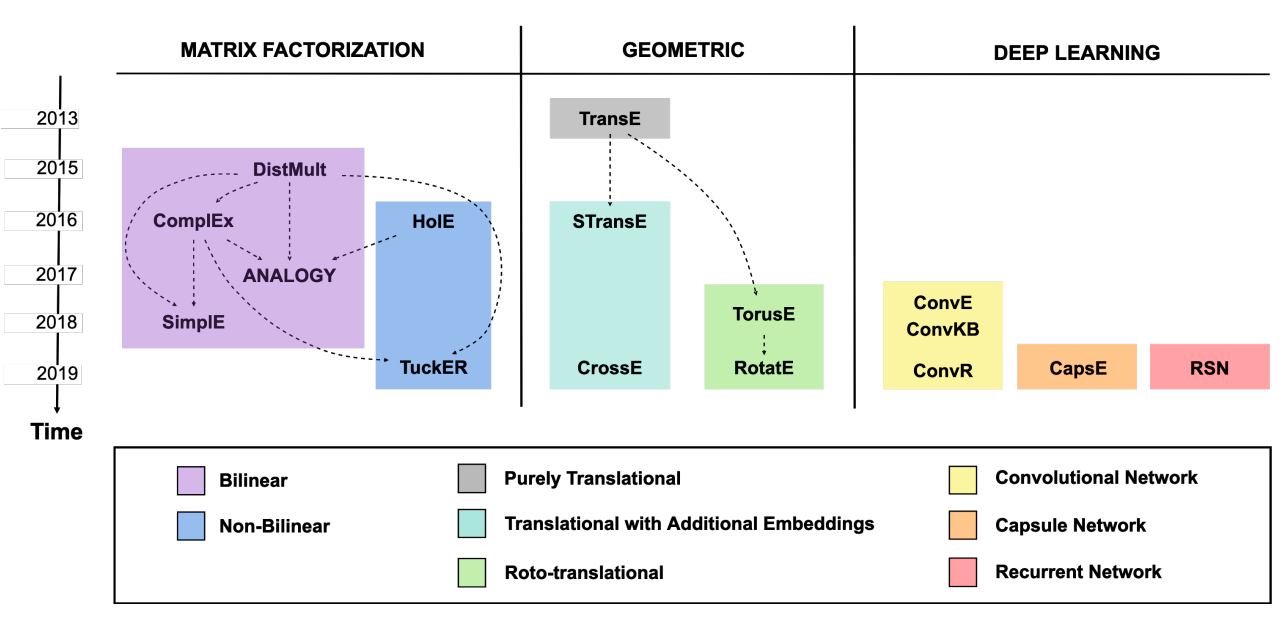

In [1]:
from IPython.display import Image
Image(filename='../images/fig-1_kg.png') 

> Phân loại cho các mô hình LP có trong phân tích của bài báo. Mũi tên được chỉ ra rằng phương thức đích xây dựng trên phương thức nguồn bằng cách khái quát hóa hoặc chuyên môn hóa định nghĩa của hàm cho điểm của nó. Các mô hình bao gồm là: [DistMult-71](../papers/71_Embedding_Entities_and_Relations_for_Learning_and_Inference_in_Knowledge_Bases.pdf);[ComplEx-61](../papers/61_Complex_Embeddings_for_Simple_Link_Prediction.pdf); [ANALOGY-35](../papers/35_Analogical_Inference_for_Multi-relational_Embeddings.pdf); [SimplE-27](../papers/27_SimplE_Embedding_for_Link_Prediction_in_Knowledge.pdf); [HolE-46](../papers/46_Holographic_Embeddings_of_Knowledge_Graphs.pdf); [TuckER-6](../papers/6_TuckER_Tensor_Factorization_for_Knowledge_Graph_Completion.pdf); [TransE-8](../papers/8_Translating_Embeddings_for_Modeling.pdf);[STransE-41](../papers/41_STransE_a_novel_embedding_model_of_entities_and_relationships_in_knowledge_bases.pdf); [CrossE-72](../papers/72_Interaction_Embeddings_for_Prediction_and_Explanation_in_Knowledge_Graphs.pdf); [TorusE-13](../papers/13_TorusE_Knowledge_Graph_Embedding_on_a_Lie_Group.pdf); [RotatE-55](../papers/55_Yago_a_core_of_semantic_knowledge.pdf); [ConvE-11](../papers/11_Convolutional_2D_Knowledge_Graph_Embeddings.pdf); [ConvKB-42](../papers/42_A_Novel_Embedding_Model_for_Knowledge_Base_Completion_Based_on_Convolutional_Neural_Network.pdf); [ConvR-25](../papers/25_Adaptive_Convolution_for_Multi-Relational_Learning.pdf); [CapsE-43](../papers/43_A_Capsule_Network-based_Embedding_Model_for_Knowledge_Graph_Completion_and_Search_Personalization.pdf); [RSN-19](../papers/19_Learning_to_Exploit_Long-term_Relational_Dependencies_in_Knowledge_Graphs.pdf)

Thông tin thêm về các mô hình được bao gồm, chẳng hạn như hàm mất mát **loss function** và độ phức tạp không gian của chúng, được báo cáo trong Bảng 1.

Trong phân tích của bài báo tập trung vào phần lõi cho các hệ thống học từ cấu trúc KG.  bài báoi giới thiệu người đọc thảo luận về cách tận dụng các nguồn thông tin bổ sung, chẳng hạn như textual captions [58], [65], [3], images [70] hoặc pre-computed rules [20]; xem [survey exclusive -18](../papers/18_A_Comprehensive_Survey_of_Knowledge_Graph.pdf) để biết khảo sát dành riêng cho các mô hình này.

Bài báo xác định ba họ chính của các mô hình: 1)*Tensor Decomposition Models*; 2) *Geometric Models*; 3) *Deep Learning Models*.

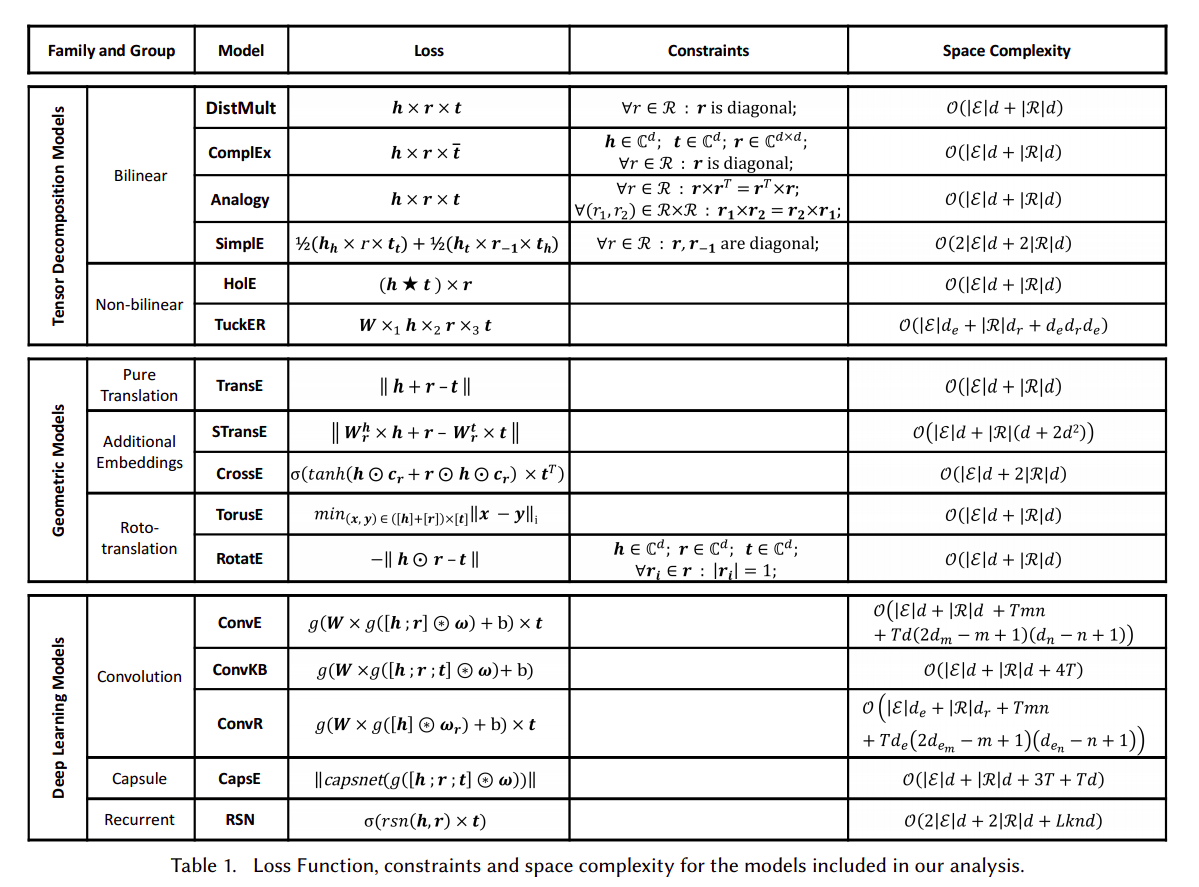

In [4]:
Image(filename='../images/table1.png') 

### 3.1TensorDecompositionModels
### *3.1 Tensor Decomposition Models*

Các mô hình trong họ này giải thích LP là một nhiệm vụ [tensor decomposition-28](../papers/28_Tensor_Decompositions_and.pdf). Các mô hình của họ này hoàn toàn coi KG là ma trận kề 3D (nghĩa là một **3-way tensor)**), chỉ có thể quan sát được một phần do sự không hoàn chỉnh của KG. **tensor** được phân tách thành một tổ hợp (ví dụ: một tích đa tuyến tính-*multi-linear product*) của các vectơ có chiều thấp *low-dimensional vectors*: các vectơ như vậy được sử dụng làm nhúng-*embeddings* cho các thực thể và quan hệ. Ý tưởng cốt lõi là, với điều kiện là mô hình không *overfit* trên tập huấn luyện, các *embeddings* được học sẽ có thể khái quát hóa và liên kết các giá trị cao với các sự kiện-facts không xác thực trong ma trận kề của đồ thị. Trong thực tế, điểm số của mỗi facts được tính toán hoạt động kết hợp trên các *embeddings* cụ thể liên quan đến facts đó; các *embeddings* được học như bình thường bằng cách tối ưu hóa hàm cho điểm cho tất cả các training facts. Các mô hình có xu hướng sử dụng ít hoặc không có tham số chia sẻ-*shared parameters* nào cả; điều này làm cho chúng đặc biệt nhẹ và dễ huấn luyện.

#### BilinearModels
### 3.1.1 Bilinear Models

Với head embedding $h \in \mathbb{R}^d$ và tail embedding $t \in \mathbb{R}^d$, các mô hình này biểu thị mối quan hệ nhúng-*relation embedding* dưới dạng ma trận hai chiều $r \in \mathbb{R}^{d \times d}$. Hàm chấm điểm sau đó được tính là một tích song tuyến **bilinear product**:
$$
\phi(h, r, t) = h \times r \times t
$$
trong đó ký hiệu $\times$ biểu thị **matrix product-nhân 2 ma trận**. Các mô hình này thường khác nhau bằng cách đưa ra các ràng buộc bổ sung cụ thể trên các nhúng mà chúng học được. Đối với nhóm này, trong phân tích so sánh của chúng tôi, chúng tôi bao gồm các mô hình đại diện sau:

[DistMult-71](../papers/71_Embedding_Entities_and_Relations_for_Learning_and_Inference_in_Knowledge_Bases.pdf)

buộc tất cả các nhúng quan hệ phải là ma trận đường chéo, điều này luôn làm giảm không gian của các tham số cần học, dẫn đến một mô hình dễ huấn luyện hơn nhiều. Mặt khác, điều này làm cho hàm tính điểm giao hoán, với $\phi(h, r, t) = \phi(t, r, s)$, có nghĩa là coi tất cả các quan hệ là đối xứng. Mặc dù vậy, điều này đã được chứng minh rằng, khi được điều chỉnh cẩn thận, DistMult vẫn có thể đạt được hiệu suất tốt [state-of-the-art performance-26](../papers/26_Knowledge_Base_Completion_Bas_lines_Strike_Back.pdf).

[ComplEx-61](../papers/61_Complex_Embeddings_for_Simple_Link_Prediction.pdf)

tương tự như DistMult, buộc mỗi quan hệ nhúng phải là một ma trận đường chéo, nhưng mở rộng công thức như vậy trong không gian phức(số phức): $h \in \mathbb{C}^d, \ t \in \mathbb{C}^d, \ r \in \mathbb{C}^{d \times d}$. Trong không gian phức, **bilinear product** trở thành **Hermitian product**, thay vì $t$ gốc, $\bar{t}$ chuyển vị liên hợp-**conjugate-transpose** của nó được sử dụng. Điều này sẽ vô hiệu hóa tính giao hoán ở trên được đề cập cho hàmg cho điểm, cho phép ComplEx cũng mô hình thành công các mối quan hệ bất đối xứng.

[ANALOGY-35](../papers/35_Analogical_Inference_for_Multi-relational_Embeddings.pdf)

nhằm mục đích mô hình hóa lý luận tương tự, đó là chìa khóa cho bất kỳ loại cảm ứng tri thức nào. Nó sử dụng hàm tính điểm song tuyến tổng quát nhưng thêm hai ràng buộc chính được lấy cảm hứng từ các cấu trúc tương tự: $\mathbf{r}$ phải là một ma trận bình thường: $\mathbf{r \ r}^T = \mathbf{r}^T \mathbf{r}$; đối với mỗi cặp quan hệ $r_1, r_2$, thành phần của chúng phải có tính giao hoán: $r1 \circ r2 = r_2 \circ r_1$. Các tác giả chứng minh rằng ma trận bình thường có thể được sử dụng thành công để mô hình hóa các mối quan hệ bất đối xứng.

[SimplE-27](../papers/27_SimplE_Embedding_for_Link_Prediction_in_Knowledge.pdf)

buộc các quan hệ *embeddings* (**relation embeddings**) là ma trận đường chéo, tương tự như **DistMult**, nhưng mở rộng nó bằng cách (i) liên kết với mỗi thực thể $e$ hai *embeddings, $eh$ và $et$, tùy thuộc vào việc $e$ được sử dụng làm **head** hay **tail**; (ii) liên kết với mỗi quan hệ $r$ hai ma trận đường chéo riêng biệt, $r$ và $r_{-1}$, biểu thị mối quan hệ theo hướng thông thường và nghịch đảo của nó. Điểm số của một sự kiện - **fact** được tính trung bình cho điểm số song tuyến tính **bilinear scores** thông thường **regular fact** và phiên bản nghịch đảo của nó. Nó đã được chứng minh rằng SimplE hoàn toàn biểu cảm, và do đó không giống như DistMult, nó có thể mô hình hóa các mối quan hệ bất đối xứng.

### *3.1.2 Non-bilinear Models*

Các mô hình kết hợp các phần nhúng **head**, **relation and tail embeddings** của *kết hợp* bằng cách sử dụng các công thức khác nhau từ tích song tuyến nghiêm ngặt **strictly bilinear product**.

[HolE-46](../papers/46_Holographic_Embeddings_of_Knowledge_Graphs.pdf)

Thay vì sử dụng các tích song tuyến tính, hãy tính tương quan vòng tròn **circular correlation** (ký hiệu là $\star$ Trong Bảng 1) giữa các phần nhúng của các thực thể đầu và đuôi **embeddings of head and tail entities**; sau đó, nó thực hiện phép nhân ma trận với việc nhúng quan hệ **relation embedding**. Lưu ý rằng trong mô hình này, các relation embedding có hình dạng giống như embeddings entities. Các tác giả đã chỉ ra rằng mối tương quan vòng tròn **circular correlation** có thể được xem là sự nén của tích ma trận đầy đủ: điều này làm cho HolE đỡ tốn chi phí hơn với mô hình song tuyến không bị giới hạn về cả độ phức tạp của thời gian và không gian.

[TuckER-6](../papers/6_TuckER_Tensor_Factorization_for_Knowledge_Graph_Completion.pdf)

dựa vào  Tucker decomposition [21], yếu tố này một tensor thành một tập các vectơ và lõi $\textbf{W}$ nhỏ hơn. Mô hình TuckER học $\textbf{W}$ cùng với các nhúng KG *KG embeddings*. Trên thực tế, việc học các tham số được chia sẻ trên toàn cục là khá hiếm trong các **Matrix Factorization Models**; các tác giả giải thích rằng $\textbf{W}$ có thể được xem như là một nhóm chung của ma trận quan hệ nguyên mẫu, được kết hợp theo cách khác nhau cho mỗi mối quan hệ tùy thuộc vào sự nhúng của nó. Trong TuckER, kích thước của các nhúng thực thể và quan hệ là độc lập với nhau, với các nhúng thực thể $e \in \mathbb{R}^{d_e}$ và nhúng nhúng quan hệ $r \in \mathbb{R}^{d_r}$. Hình dạng-Shape của $W$ phụ thuộc vào kích thước của các thực thể và quan hệ, với $W \in \mathbb{R}^{d_e \times d_r \times d_e}$. Trong Bảng 1, chúng tôi biểu thị bằng $\times i$ *tensor product* dọc theo chế độ i được sử dụng bởi TuckER.

## *3.2 Geometric Models*
**Geometric Models** diễn giải các mối quan hệ như các biến đổi hình học trong không gian ẩn. Với một fact, phần **head** nhúng trải qua một phép biến đổi $\tau$ không gian sử dụng các giá trị của phần nhúng quan hệ làm tham số **relation embedding as parameters**. Điểm thực tế là khoảng cách giữa vectơ kết quả và vectơ **tail**; một offset như vậy được tính bằng cách sử dụng hàm khoảng cách $\delta$ (ví dụ: L1 của L2 norm).
$$
\phi(h, r, t) = \delta(\tau(h, t), r)
$$

Tùy thuộc vào dạng phân tích của $\tau$, các mô hình hình học có thể chia sẻ các điểm tương đồng với các **Tensor Decomposition models**, nhưng trong các trường hợp này, các mô hình hình học thường cần phải thực thi các ràng buộc bổ sung để thực hiện phép biến đổi không gian hợp lệ của chúng. Ví dụ, phép quay được vận hành bởi mô hình **RotatE** có thể được định dạng như một tích ma trận, nhưng ma trận xoay sẽ cần phải có đường chéo và có các phần tử với mô đun 1-modulus 1.

Giống như với **Matrix Factorization Models**, các hệ thống này thường tránh các tham số được chia sẻ, chạy lan truyền ngược trực tiếp trên các **embeddings**. Chúng tôi xác định ba nhóm trong họ này: (i) *Pure Translational Models* (Mô hình tịnh tiến thuần túy) (ii) *Translational
Models with Additional Embeddings* (Mô hình tịnh tiến với các nhúng bổ sung) và (iii) *Roto-translational models* (Mô hình dịch mã Roto).

### 3.2.1 Pure Translational Models

### 3.2.2 Translational models with Additional Embeddings

### 3.2.3 Roto-Translational Models

## *3.3 Deep Learning Models*

### 3.3.1 Convolutional Neural Networks

### 3.3.2 Capsule Neural Networks

### 3.3.3 Recurrent Neural Networks (RNNs)